# <font color=#0066ff> Supplier Onboarding </font>


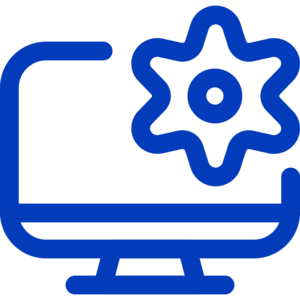

## <font color='yellow'>Code for token generation and API management</font>
      

In [ ]:
#@title Select **servicePack** the Sample should run
from subprocess import getstatusoutput
servicePack = "DEMO" #@param ['DEMO'] {allow-input: true}

if servicePack == 'DEMO':
  branch = 'main'
else:
  branch = servicePack
print(branch)
rm = getstatusoutput("rm Colab_shared_code_for_API_usage -rf ") 
clone = getstatusoutput("git clone -l -s --branch " +  branch + " https://github.com/kyriba/Colab_shared_code_for_API_usage.git") 
import importlib
try:  
  importlib.reload(sample_requests)
except:
  print()
from Colab_shared_code_for_API_usage import sample_requests


In [2]:
#@title Import custom modules
import time
from datetime import datetime,date
import json as js
import copy
import numpy as np


## <font color='yellow'>Connect and  retrieve token</font>

In [ ]:
#@title <font color='lime'>Connect</font>
print('token:')
token = sample_requests.login()

## <font color='yellow'>Third Parties</font>

In [ ]:
#@title <font color='lime'>Filter third parties by code</font>
thirdPartyCode= 'THIRD-PARTY2' #@param {type:"string"}

def show_results(df):
  df2 = copy.deepcopy(df)
  df2.replace(np.nan, '-', inplace = True)
  display(df2)

try:
  # get all third parties in json
  res2 = sample_requests.get_results(token, '/v1/third-parties?filter=code==' + thirdPartyCode)
  ppjson = js.loads(res2, parse_int=int) 
  # list of columns to display results from Third Parties
  colunmsTP = ['uuid', 'code', 'name', 'creationDate', 'updateDate', 'activeStatus']  
  # convert json to dataFrame
  df2 = sample_requests.pd.json_normalize(ppjson['results']).filter(items=['uuid', 'code', 'name', 'creationDate', 'updateDate', 'activeStatus', 'businessIdentifiers.otherIdentifierType', 'address.country.code'], axis =1)
  df2 = df2[colunmsTP]
  show_results(df2)
except Exception as e: 
  print('No Third party with applied filter was found.')



In [ ]:
#@title <font color='lime'> Create a third party</font>
#@markdown Provide values for parameters below:
code = 'THIRD-PARTY1' #@param {type:"string"}
addressCountryCode = 'FR' #@param ['FR', 'GB', 'GG', 'JP', 'PL', 'SG', 'US'] {allow-input: true} {type:"string"} 
name = 'Name' #@param {type: "string"}

checker = 'false'

payload = sample_requests.js.dumps({
  "code": code,
  "address": {
    "country": {
      "code": addressCountryCode
    }
  },
  "name": name
})

#print(payload)

# create third party in json 
try: 
  res2 = sample_requests.post_results(token, '/v1/third-parties', payload, {}, {'Content-Type': 'application/json'})
  try:
    if res2['code'] == code:
      checker = 'true'
      print('\nThird party ' + code + ' was succesfully created in Kyriba.')
      print()
      # print(res2)
  except:
    print()
    # print('Error')
    print("\nThird party " + code + " could not be created in Kyriba.")
except sample_requests.ResponceError as err:
  print('Third party ' + code + ' could not be created in Kyriba.')
print()
print()

## <font color='yellow'>Supplier Users</font>

In [ ]:
#@title <font color='lime'>Filter supplier users by code</font>
supplierUserCode= 'SUPPLIER8' #@param {type:"string"}

try:
  # get all third parties in json
  res2 = sample_requests.get_results(token, '/v1/workcap/supplier-users?filter=code==*' + supplierUserCode)
  ppjson = js.loads(res2, parse_int=int) 
  # list of columns to display results from Third Parties
  colunmsTP = ['uuid', 'code', 'interfaceCode', 'firstName', 'lastName', 'email', 'thirdParty.code', 'accessProfile.code', 'companyOwnership.code']  
  # convert json to dataFrame
  df3 = sample_requests.pd.json_normalize(ppjson['results']).filter(items=['uuid', 'code', 'interfaceCode', 'firstName', 'lastName', 'email', 'thirdParty.code', 'accessProfile.code', 'companyOwnership.code', 'active', 'systemAdministrator', 'creationDate', 'lastUpdateDate'], axis =1)
  df3 = df3[colunmsTP]
except Exception as e: 
  print('No Supplier user with applied filter was found.')

df3


In [ ]:
#@title <font color='lime'> Create a supplier user</font>
#@markdown Provide values for parameters below:
supplierCode = 'SUPPLIER8' #@param {type:"string"}
interfaceCode = 'SUP8' #@param {type: "string"}
accessProfileCode = 'AUTO' #@param {allow-input: true} {type:"string"} 
companyOwnershipCode = 'COMPANY01' #@param {allow-input: true} {type:"string"} 
email = 'supplier8@gmail.com' #@param {allow-input: true} {type:"string"} 
firstName = 'John' #@param {allow-input: true} {type:"string"} 
lastName = 'Doe' #@param {allow-input: true} {type:"string"} 
preferredContactChannel = 'EMAIL' #@param {allow-input: true} {type:"string"} 
thirdPartyCode = 'THIRD-PARTY2' #@param {allow-input: true} {type:"string"} 
timeZone = 'CET' #@param {allow-input: true} {type:"string"} 

checker = 'false'

payload = sample_requests.js.dumps({
    "accessProfile": {
        "code": accessProfileCode
    },
    "code": supplierCode,
    "interfaceCode": interfaceCode,
    "companyOwnership": {
        "code": companyOwnershipCode
    },
    "email": email,
    "firstName": firstName,
    "lastName": lastName,
    "preferredContactChannel": preferredContactChannel,
    "thirdParty": {
        "code": thirdPartyCode
    },
    "timeZone": timeZone
})

#print(payload)

cfg = sample_requests.pd.read_csv("/content/config.csv")
client_id = cfg['client_id'].values[0]
test = client_id.split('@')
client_id = test[0]
client_id

# create supplier user in json 
try: 
  res2 = sample_requests.post_results(token, '/v1/workcap/supplier-users', payload, {}, {'Content-Type': 'application/json'})
  try:
    if res2['code'] == client_id + '@' + supplierCode:
      checker = 'true'
      print('\nSupplier user ' + supplierCode + ' was succesfully created in Kyriba.')
      print()
      # print(res2)
  except:
    print()
    # print('Error')
    print("\nSupplier user " + supplierCode  + " could not be created in Kyriba.")
except Exception2 as e2:
  print('Supplier user ' + supplierCode + ' could not be created in Kyriba.')
print()
print()

## <font color='yellow'>Supplier Service Accesses</font>

In [ ]:
#@title <font color='lime'>Filter supplier service accesses by third party code</font>
accessThirdPartyCode = 'THIRD-PARTY2' #@param {type:"string"}

try:
  # get all third parties in json
  res2 = sample_requests.get_results(token, '/v1/workcap/supplier-service-accesses?filter=thirdParty.code==' + accessThirdPartyCode)
  ppjson = js.loads(res2, parse_int=int) 
  # list of columns to display results from Third Parties
  colunmsTP = ['uuid', 'thirdParty.code', 'buyer.code', 'companyOwnership.code', 'disputeManagement', 'invoiceAuction', 'invoiceDiscounting', 'invoiceInformation', 'reverseFactoring']  
  # convert json to dataFrame
  df4 = sample_requests.pd.json_normalize(ppjson['results']).filter(items=colunmsTP, axis =1)
  display(df4)
except Exception as e: 
  print('No Supplier user with applied filter was found.')




In [ ]:
#@title <font color='lime'> Create a supplier service access</font>
#@markdown Provide values for parameters below:
thirdPartyCode = 'THIRD-PARTY2' #@param {allow-input: true} {type:"string"} 
buyerCode = 'COMPANY01' #@param {allow-input: true} {type:"string"}
companyOwnershipCode = 'COMPANY01' #@param {allow-input: true} {type:"string"} 
disputeManagement = 'CLOSED' #@param ['ALL', 'OPENING_REQUESTED', 'OPENED', 'INVITED', 'CLOSED', 'REVOCATION_REQUESTED'] {type:"string"} 
invoiceAuction = 'CLOSED' #@param ['ALL', 'OPENING_REQUESTED', 'OPENED', 'INVITED', 'CLOSED', 'REVOCATION_REQUESTED'] {type:"string"} 
invoiceDiscounting = 'CLOSED' #@param ['ALL', 'OPENING_REQUESTED', 'OPENED', 'INVITED', 'CLOSED', 'REVOCATION_REQUESTED'] {type:"string"} 
invoiceInformation = 'CLOSED' #@param ['ALL', 'OPENING_REQUESTED', 'OPENED', 'INVITED', 'CLOSED', 'REVOCATION_REQUESTED'] {type:"string"} 
reverseFactoring = 'CLOSED' #@param ['ALL', 'OPENING_REQUESTED', 'OPENED', 'INVITED', 'CLOSED', 'REVOCATION_REQUESTED'] {type:"string"} 


checker = 'false'

payload = sample_requests.js.dumps({
  "buyer": {
        "code": buyerCode
    },
    "companyOwnership": {
        "code": companyOwnershipCode
    },
    "disputeManagement": disputeManagement,
    "invoiceAuction": invoiceAuction,
    "invoiceDiscounting": invoiceDiscounting,
    "invoiceInformation": invoiceInformation,
    "reverseFactoring": reverseFactoring,
    "thirdParty": {
        "code": thirdPartyCode
    }
})

#print(payload)

# create supplier user in json 
try: 
  res2 = sample_requests.post_results(token, '/v1/workcap/supplier-service-accesses', payload, {}, {'Content-Type': 'application/json'})
  try:
    if res2['uuid']:
      checker = 'true'
      print('\nSupplier service access was succesfully created in Kyriba.')
      display('uuid: ' + res2['uuid'])
      print()
      # print(res2)
  except:
    print()
    print('Supplier service access could not be created in Kyriba.')
except Exception2 as e2:
  print('Supplier service access could not be created in Kyriba.')
print()
print()

## <font color='yellow'>Kyriba APIs: build your future</font>

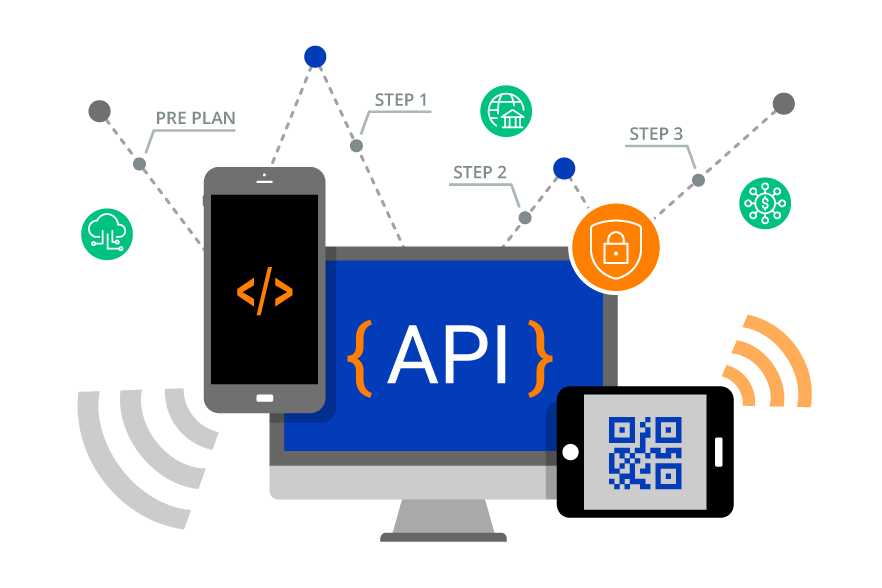